import data set

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
#visualisasi
import matplotlib.pyplot as plt
#modeling dan training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle  # Library untuk menyimpan model


In [94]:
dataset = df = pd.read_csv('/content/Dataset.csv')

In [95]:
df.head(20)

,MoisturePercentage,Humidity,Heatcelcius
0,0.6491,0.617,35.1
1,0.6999,0.628,35.1
2,0.6999,0.631,35.1
3,0.7019,0.646,35.1
4,0.7009,0.648,35.1
5,0.7028,0.647,35.1
6,0.7087,0.643,35.1
7,0.7058,0.643,35.1
8,0.5445,0.658,34.9
9,0.4907,0.656,34.8


In [96]:
df.shape

(93, 3)

In [97]:
df.describe()

,MoisturePercentage,Humidity,Heatcelcius
count,93.000000,93.00000,93.000000
mean,0.560731,0.68272,34.973118
std,0.099847,0.04892,0.187744
min,0.450600,0.60100,34.600000
25%,0.477000,0.64400,34.800000
50%,0.530800,0.66200,35.000000
75%,0.639300,0.72000,35.100000
max,0.741900,0.79300,35.300000


visualisasi

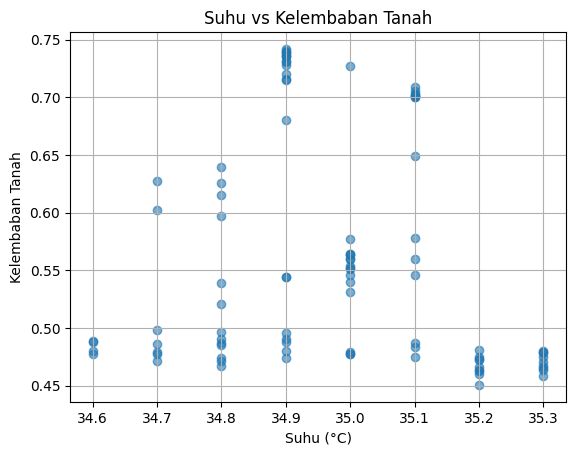

In [98]:
plt.scatter(dataset['Heatcelcius'], dataset['MoisturePercentage'], alpha=0.6)
plt.title('Suhu vs Kelembaban Tanah')
plt.xlabel('Suhu (°C)')
plt.ylabel('Kelembaban Tanah')
plt.grid(True)
plt.show()

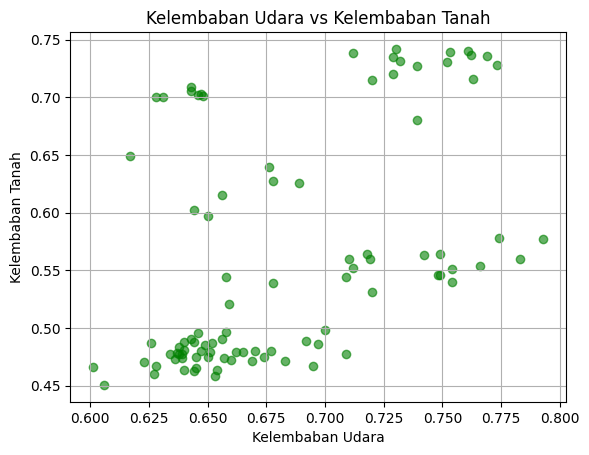

In [99]:
plt.scatter(dataset['Humidity'], dataset['MoisturePercentage'], alpha=0.6, color='green')
plt.title('Kelembaban Udara vs Kelembaban Tanah')
plt.xlabel('Kelembaban Udara')
plt.ylabel('Kelembaban Tanah')
plt.grid(True)
plt.show()

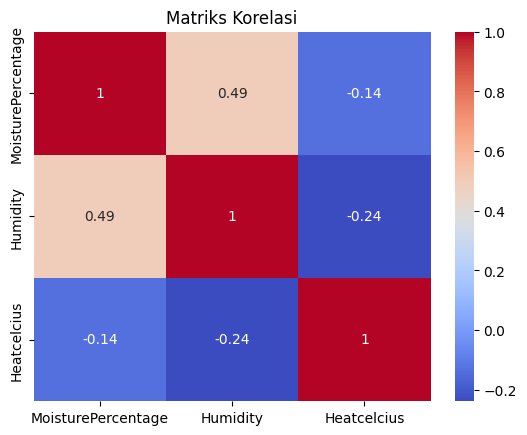

In [100]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

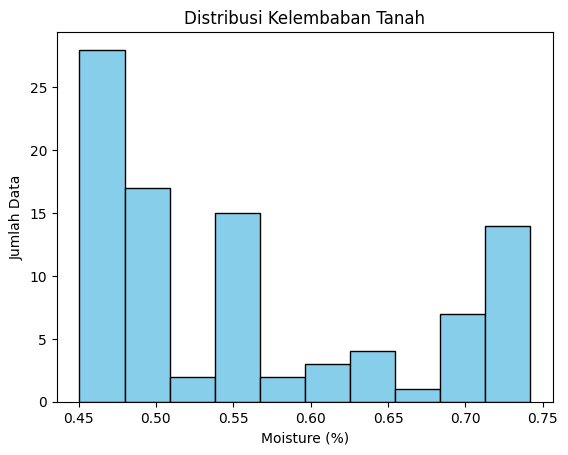

In [101]:
plt.hist(dataset['MoisturePercentage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribusi Kelembaban Tanah')
plt.xlabel('Moisture (%)')
plt.ylabel('Jumlah Data')
plt.show()

training

In [102]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 0].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

modeling

random forest regression

In [105]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

In [106]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [107]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.035598578947368384
Mean Squared Error: 0.002372358525342107
Root Mean Squared Error: 0.04870686322626522


In [108]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.6999,0.624340
1,0.4751,0.461087
2,0.7400,0.730610
3,0.6276,0.493520
4,0.5210,0.492900
5,0.7312,0.738840
6,0.5777,0.556808
7,0.4633,0.461275
8,0.4604,0.494765
9,0.4741,0.479010


In [109]:
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))

Training Accuracy =  0.9079439562021039
Test Accuracy =  0.7869353933798938


In [110]:
model_filename = '/content/model.pkl'  # Lokasi untuk menyimpan file .pkl
with open(model_filename, 'wb') as f:
    pickle.dump(regressor, f)  # Menyimpan model
    pickle.dump(sc, f)         # Menyimpan scaler untuk digunakan nanti
print(f"Model saved to {model_filename}")

Model saved to /content/model.pkl


In [112]:
from google.colab import files
files.download('/content/model.pkl')  # Mengunduh model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
with open('/content/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    loaded_scaler = pickle.load(f)

In [114]:
sample = [[0.65, 34.8]]  # Sesuaikan dengan urutan fitur
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

# Tentukan apakah perlu penyiraman
butuh_siram = 1 if prediction[0] < 0.5 else 0
print("Prediksi MoisturePercentage:", prediction[0])
print("Prediksi Butuh Siram:", "Ya" if butuh_siram == 1 else "Tidak")

Prediksi MoisturePercentage: 0.546975
Prediksi Butuh Siram: Tidak
